<a href="https://colab.research.google.com/github/swikriti15/parkinson-ml/blob/main/AQIsvr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


MSE: 243.66885740989227
RMSE: 15.609896137062933
R^2 Score: 0.9591273045948919


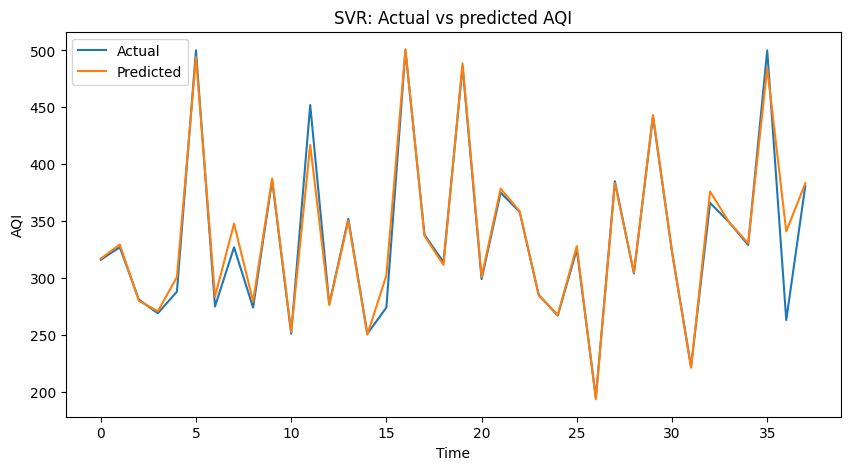

In [32]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/cleaned_air_quality.csv")
# Convert 'DateTime' to datetime objects if it's not already
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract time-based features
df['Hour'] = df['DateTime'].dt.hour
df['DayOfWeek'] = df['DateTime'].dt.dayofweek
df['DayOfYear'] = df['DateTime'].dt.dayofyear
df['Month'] = df['DateTime'].dt.month

# Remove non-numeric columns and the original Date, Time, DateTime columns
X = df.drop(["PM2.5 AQI", "Date", "Time", "DateTime"], axis=1)
y = df["PM2.5 AQI"]

# Drop rows with missing values in X and y
data = pd.concat([X, y], axis=1).dropna()
X = data.drop("PM2.5 AQI", axis=1)
y = data["PM2.5 AQI"]

# Split data into training and testing sets AFTER handling missing values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model with the best parameters found by GridSearchCV
best_params = grid_search.best_params_
model = SVR(**best_params)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R^2 Score:", r2)

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.title("SVR: Actual vs predicted AQI")
plt.xlabel("Time")
plt.ylabel("AQI")
plt.legend()
plt.show()

In [30]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for SVR
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1],
    'epsilon': [0.01, 0.1, 1]
}

# Create a GridSearchCV object
# Using the same SVR model but without predefined hyperparameters
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and the best score
print("Best parameters found:", grid_search.best_params_)
print("Best R^2 score found:", grid_search.best_score_)

Best parameters found: {'C': 100, 'epsilon': 0.1, 'gamma': 1}
Best R^2 score found: 0.9676723216430319


In [28]:
# Convert 'DateTime' to datetime objects if it's not already
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract time-based features
df['Hour'] = df['DateTime'].dt.hour
df['DayOfWeek'] = df['DateTime'].dt.dayofweek
df['DayOfYear'] = df['DateTime'].dt.dayofyear
df['Month'] = df['DateTime'].dt.month

display(df.head())

,Date,Time,PM2.5,PM2.5 AQI,DateTime,Hour,DayOfWeek,DayOfYear,Month
0,1/1/2014,1:00 AM,235.0,175.0,2014-01-01 01:00:00,1,2,1,1
1,1/1/2014,2:00 AM,228.0,177.0,2014-01-01 02:00:00,2,2,1,1
2,1/1/2014,3:00 AM,260.0,181.0,2014-01-01 03:00:00,3,2,1,1
3,1/1/2014,4:00 AM,268.0,185.0,2014-01-01 04:00:00,4,2,1,1
4,1/1/2014,5:00 AM,234.0,191.0,2014-01-01 05:00:00,5,2,1,1
